<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/2ndWeekTask/Logistic%20Regression%20For%20CitarumWater.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.7940
Precision (Macro): 0.8462
Recall (Macro): 0.6803
F1 Score (Macro): 0.7392
AUC: 0.9358

Confusion Matrix:
[[132  64   0   0]
 [ 35 259   0   0]
 [  0   2   4   0]
 [  0   1   1   2]]

Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.67      0.73       196
           2       0.79      0.88      0.84       294
           3       0.80      0.67      0.73         6
           4       1.00      0.50      0.67         4

    accuracy                           0.79       500
   macro avg       0.85      0.68      0.74       500
weighted avg       0.79      0.79      0.79       500



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


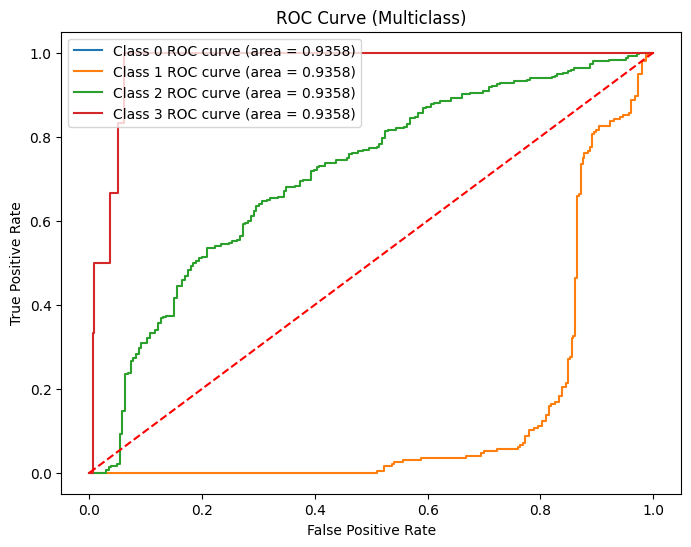

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assign path dataset
data = pd.read_csv('/content/sample_data/CitarumWater.csv')

# Mengubah kolom yang bentuk string menjadi numerical menggunakan one-hot encoding
data_encoded = pd.get_dummies(data)

# Menggunakan kolom Class sebagai target kualitas air
X = data_encoded.drop('Class', axis=1)  # Features (independent variables)
y = data_encoded['Class']  # Target (dependent variable)

# Bagi 2 menjadi training data (80%) dan test data(20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Ingat random_state itu seeds kerandomannya

# Melakukan standarisasi untuk bagian feature menggunakan standardscaler dari Scikit-learn (optional but useful for Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # fit = mengkalkulasikan mean dan standard deviasi dari feature di training data
                                        # transform = menggunakan mean dan deviasi tadi untuk menyeimbangkan/scale training data supaya setiap feature memiliki mean 0 dan deviasi 1
X_test = scaler.transform(X_test)       # Test data hanya ditransform untuk menyeimbangkan test data dan training data di level yang sama

# Membuat model logistic regression
log_model = LogisticRegression(multi_class='ovr', max_iter=1000)

# Training
log_model.fit(X_train, y_train)

# Prediksi
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Pada bagian ini dilakukan macro average supaya setiap class memiliki nilai yang setara untuk diukur (memastikan bahwa class yang lebih kecil terwakili secara memadai dalam metrik kinerja.)
# Precision (macro average for multiclass classification)
precision = precision_score(y_test, y_pred, average='macro')

# Recall (macro average for multiclass classification)
recall = recall_score(y_test, y_pred, average='macro')

# F1 Score (macro average for multiclass classification)
f1 = f1_score(y_test, y_pred, average='macro')

# AUC Score (for multiclass classification)
auc = roc_auc_score(y_test, y_prob, multi_class='ovr')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
class_report = classification_report(y_test, y_pred)

# Hasil Evaluasi
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision (Macro): {precision:.4f}')
print(f'Recall (Macro): {recall:.4f}')
print(f'F1 Score (Macro): {f1:.4f}')
print(f'AUC: {auc:.4f}')
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Plot the ROC Curve for the first class (for simplicity, more classes can be added)
fpr = {}
tpr = {}
plt.figure(figsize=(8,6))
for i in range(len(log_model.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_prob[:, i], pos_label=i)
    plt.plot(fpr[i], tpr[i], label=f'Class {i} ROC curve (area = {roc_auc_score(y_test, y_prob, multi_class="ovr"):.4f})')

plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Multiclass)')
plt.legend()
plt.show()
